<span style="font-size: 280%;color:#1155cc"> PyTorch_1_Najprostrza regresja liniowa
    
<span style="font-size: 150%;color:Red"> 16.09.2020
    

In [1]:
import torch
import torch.nn as nn

https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0

<span style="font-size: 180%;color:#1155cc"> Odpalam karte graficzną GPU

In [2]:
#device = torch.device('cpu') # obliczenia robie na CPU
device = torch.device('cuda') # obliczenia robie na GPU
device

device(type='cuda')

<span style="font-size: 180%;color:#1155cc">1. Pobranie baza danych csv</span>


Zacznijmy od utworzenia przykładowych danych za pomocą torch.

In [3]:
import pandas as pd
df = pd.read_csv('/media/wojciech/D6DE33C1DE3399271/1A/WorldHappinessReport.csv')
# usecols=[1,2,3,4,5]
df.head(3)

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015.0
1,1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015.0
2,2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015.0


In [4]:
df.shape

(495, 13)

<span style="font-size: 180%;color:#1155cc">2. Usuwanie pustych komórek NaN </span>

Sieci nieuronowe nie lubiś pustych komórek NaN

In [5]:
df = df.dropna(how ='any')
df.isnull().sum()

Unnamed: 0                       0
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

<span style="font-size: 120%;color:#1155cc"> Wybieram zmienne do modelu

In [6]:
df.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

'Happiness Score','Economy (GDP per Capita)','Freedom', 'Trust (Government Corruption)'

In [7]:
df[['Economy (GDP per Capita)','Freedom','Happiness Score', 'Trust (Government Corruption)']].head(3)

,Economy (GDP per Capita),Freedom,Happiness Score,Trust (Government Corruption)
0,0.31982,0.23414,3.575,0.09719
1,0.87867,0.35733,4.959,0.06413
2,0.93929,0.28579,5.605,0.17383


<span style="font-size: 180%;color:#1155cc">3. Przekształcanie na tensor zmiennych niezależnych</span>

 - 'Happiness Score',
 - 'Economy (GDP per Capita)',
 - 'Freedom', 
 - 'Trust (Government Corruption)'

In [8]:
X = torch.tensor((df['Economy (GDP per Capita)'],df['Freedom'],df['Trust (Government Corruption)']), dtype=torch.float, device=device)
X

tensor([[0.3198, 0.8787, 0.9393,  ..., 0.5917, 0.6364, 0.3758],
        [0.2341, 0.3573, 0.2858,  ..., 0.2495, 0.4616, 0.3364],
        [0.0972, 0.0641, 0.1738,  ..., 0.0568, 0.0782, 0.0954]],
       device='cuda:0')

Tak jak widać powyżej kolumny odpowiadają wierszom z dataframe dlatego


<span style="font-size: 180%;color:#1155cc"> 3.1 TRansponuje wektor zmiennych niezależnych aby stał się kolumną</span>

In [9]:
X = torch.transpose(X.flip(0),0,1)
X

tensor([[0.0972, 0.2341, 0.3198],
        [0.0641, 0.3573, 0.8787],
        [0.1738, 0.2858, 0.9393],
        ...,
        [0.0568, 0.2495, 0.5917],
        [0.0782, 0.4616, 0.6364],
        [0.0954, 0.3364, 0.3758]], device='cuda:0')

Ma mieć 469 obserwacje dla trzech zmiennych opisujących: 'Trust (Government Corruption)','Freedom', 'Economy (GDP per Capita)' 

In [10]:
X[0,:]

tensor([0.0972, 0.2341, 0.3198], device='cuda:0')

In [11]:
X.size()

torch.Size([469, 3])

<span style="font-size: 180%;color:#1155cc">4. Przekształcanie na tensor zmiennych zależnych: 'Happiness Score'</span>

In [12]:
y = torch.tensor((df['Happiness Score']), dtype=torch.float,device=device)

print(y.size())
y

torch.Size([469])


tensor([3.5750, 4.9590, 5.6050, 4.0330, 6.5740, 4.3500, 7.2840, 7.2000, 5.2120,
        5.9600, 4.6940, 5.8130, 6.9370, 3.3400, 5.2530, 5.8900, 4.9490, 4.3320,
        6.9830, 4.2180, 3.5870, 2.9050, 3.8190, 4.2520, 7.4270, 3.6780, 3.6670,
        6.6700, 5.1400, 6.4770, 3.9560, 3.9890, 4.5170, 7.2260, 5.7590, 5.6890,
        6.5050, 7.5270, 4.3690, 4.8850, 5.9750, 4.1940, 6.1300, 5.4290, 4.5120,
        7.4060, 6.5750, 3.8960, 4.2970, 6.7500, 4.6330, 4.8570, 6.1230, 3.6560,
        4.5180, 4.7880, 5.4740, 4.8000, 7.5610, 4.5650, 5.3990, 4.6860, 4.6770,
        6.9400, 7.2780, 5.9480, 3.6550, 5.7090, 5.9870, 5.1920, 5.8550, 4.4190,
        5.5890, 6.2950, 5.2860, 4.8760, 5.0980, 4.8390, 4.8980, 4.5710, 5.7540,
        5.8330, 6.9460, 5.0070, 3.6810, 4.2920, 5.7700, 3.9950, 6.3020, 4.4360,
        5.4770, 7.1870, 5.8890, 4.8740, 5.1920, 5.0130, 4.9710, 4.3070, 4.5140,
        7.3780, 7.2860, 5.8280, 3.8450, 5.2680, 5.6950, 7.5220, 6.8530, 5.1940,
        4.7150, 6.7860, 5.8780, 5.8240, 

<span style="font-size: 180%;color:#1155cc"> 4.1 TRansponuje wektor wynikowy aby stał się kolumną</span>

In [13]:
y = y.view(y.shape[0],1)

In [14]:
y

tensor([[3.5750],
        [4.9590],
        [5.6050],
        [4.0330],
        [6.5740],
        [4.3500],
        [7.2840],
        [7.2000],
        [5.2120],
        [5.9600],
        [4.6940],
        [5.8130],
        [6.9370],
        [3.3400],
        [5.2530],
        [5.8900],
        [4.9490],
        [4.3320],
        [6.9830],
        [4.2180],
        [3.5870],
        [2.9050],
        [3.8190],
        [4.2520],
        [7.4270],
        [3.6780],
        [3.6670],
        [6.6700],
        [5.1400],
        [6.4770],
        [3.9560],
        [3.9890],
        [4.5170],
        [7.2260],
        [5.7590],
        [5.6890],
        [6.5050],
        [7.5270],
        [4.3690],
        [4.8850],
        [5.9750],
        [4.1940],
        [6.1300],
        [5.4290],
        [4.5120],
        [7.4060],
        [6.5750],
        [3.8960],
        [4.2970],
        [6.7500],
        [4.6330],
        [4.8570],
        [6.1230],
        [3.6560],
        [4.5180],
        [4

Ma mieć 469 obserwacje i jeden wymiar wynikowy

In [15]:
y.size()

torch.Size([469, 1])

<span style="font-size: 180%;color:#1155cc"> Sprawdzam czy wyniki tensorów są OK
    
    Mamy identyczny układ jak w dataTable DF

In [16]:
print('Tensor zmiennych opisujących:', X.size())
print('Tensor zmiennych wynikowych: ',y.size())

Tensor zmiennych opisujących: torch.Size([469, 3])
Tensor zmiennych wynikowych:  torch.Size([469, 1])


<span style="font-size: 180%;color:#1155cc">  JEDEN REKORD, który podstawimy do modelu gdy będzie gotowy.
    
    aby sprawdzić czy model dobrze liczy

#### Wartość xPredicted

Zmienna xPredicted jest pojedynczym wejściem (jednym krajem), dla którego chcemy przewidzieć ocenę z wykorzystaniem parametrów wyuczonych przez sieć neuronową.

In [17]:
xPredicted = torch.tensor(([0.0954, 0.3364, 0.3758]), dtype=torch.float,device=device)
print('Tensor zmiennych do prognozy: ',xPredicted.size())

Tensor zmiennych do prognozy:  torch.Size([3])


In [18]:
xPredicted

tensor([0.0954, 0.3364, 0.3758], device='cuda:0')

#### Sprawdzam czy wymiary tensorów są OK

Tensor zmiennych opisujących   : torch.Size([22, 4])

Tensor zmiennych wynikowych    : torch.Size([22, 1])

Tensor 1 obserwacji do prognozy: torch.Size([4])

In [19]:
print('Tensor zmiennych opisujących   :',X.size())
print('Tensor zmiennych wynikowych    :',y.size())
print('Tensor 1 obserwacji do prognozy:',xPredicted.size())

Tensor zmiennych opisujących   : torch.Size([469, 3])
Tensor zmiennych wynikowych    : torch.Size([469, 1])
Tensor 1 obserwacji do prognozy: torch.Size([3])


### Skalowanie i normalizacja
Dane przetwarzane przez sieć pochodzą najczęściej z obserwacji pewnych wartości w badanym modelu. Ich skala wartości zazwyczaj nie na bezpośrednie wprowadzenie na wejścia sieci. Istnieje kilka popularnych metod skalowania: 

skalowanie względem wartości maksymalnej: 

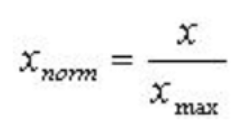


### Skalowanie wartości X

In [20]:
# scale units
X_max, _ = torch.max(X, 0)
X = torch.div(X, X_max)


print(X)

tensor([[0.1761, 0.3496, 0.1710],
        [0.1162, 0.5335, 0.4697],
        [0.3150, 0.4267, 0.5021],
        ...,
        [0.1029, 0.3725, 0.3163],
        [0.1417, 0.6892, 0.3402],
        [0.1728, 0.5023, 0.2009]], device='cuda:0')


### Skalowanie wartości y i wartości, pod którą szukamy prognozy

In [21]:
xPredicted_max, _ = torch.max(xPredicted, 0)
xPredicted = torch.div(xPredicted, xPredicted_max)
y = y / 100  # max test score is 100
print(xPredicted)
print(y)

tensor([0.2539, 0.8952, 1.0000], device='cuda:0')
tensor([[0.0357],
        [0.0496],
        [0.0560],
        [0.0403],
        [0.0657],
        [0.0435],
        [0.0728],
        [0.0720],
        [0.0521],
        [0.0596],
        [0.0469],
        [0.0581],
        [0.0694],
        [0.0334],
        [0.0525],
        [0.0589],
        [0.0495],
        [0.0433],
        [0.0698],
        [0.0422],
        [0.0359],
        [0.0290],
        [0.0382],
        [0.0425],
        [0.0743],
        [0.0368],
        [0.0367],
        [0.0667],
        [0.0514],
        [0.0648],
        [0.0396],
        [0.0399],
        [0.0452],
        [0.0723],
        [0.0576],
        [0.0569],
        [0.0650],
        [0.0753],
        [0.0437],
        [0.0488],
        [0.0597],
        [0.0419],
        [0.0613],
        [0.0543],
        [0.0451],
        [0.0741],
        [0.0657],
        [0.0390],
        [0.0430],
        [0.0675],
        [0.0463],
        [0.0486],
        [0.061

#### DEFINIOWANIE MODELU

In [22]:
class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 3   # ---WARSTWA WEJŚCIOWA -- Tyle ile jest obserwacji (kolumn po trnspozycji macierzy X)
        self.outputSize = 1  # ---WARSTWA WYJŚCIOWA -- Tyle ile jest Y (tu mamy 1 kolumnę)
        self.hiddenSize = 3  # --WARSTWA UKRYTA ---Tyle ile jest obserwacji (kolumn po trnspozycji macierzy X)
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize,device=device) # 3 X 55 tensor
        self.W2 = torch.randn(self.hiddenSize, self.outputSize,device=device) # 55 X 1 tensor
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 55".dot" does not broadcast in PyTorch
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o)
        
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        # you can reload model with all the weights and so forth with:
        # torch.load("NN")
        
    

### Trening
Pozostało już tylko trenować sieć neuronową. Najpierw tworzymy instancję wykresu obliczeniowego, który właśnie zbudowaliśmy:

In [23]:
NN = Neural_Network()

In [24]:
X.size()

torch.Size([469, 3])

In [25]:
y.size()

torch.Size([469, 1])

Następnie trenujemy model do 150 rund. Zauważ, że w PyTorch NN(X) automatycznie wywołuje funkcję forward, więc nie ma potrzeby jawnego wywoływania NN.forward(X).

Po uzyskaniu przewidywanego wyniku dla każdej rundy szkolenia, obliczamy stratę za pomocą następującego kodu:

In [26]:
torch.mean((y - NN(X))**2).detach().item()

0.08685585856437683

In [27]:
NN = Neural_Network()
for i in range(150):  # trains the NN 1500 times
    print ("#" + str(i) + " Loss: " + str(torch.mean((y - NN(X))**2).detach().item()))  # mean sum squared loss
    NN.train(X, y)
NN.saveWeights(NN)


#0 Loss: 0.2526997923851013
#1 Loss: 0.0030135137494653463
#2 Loss: 0.0030135137494653463
#3 Loss: 0.0030135137494653463
#4 Loss: 0.0030135137494653463
#5 Loss: 0.0030135137494653463
#6 Loss: 0.0030135137494653463
#7 Loss: 0.0030135137494653463
#8 Loss: 0.0030135137494653463
#9 Loss: 0.0030135137494653463
#10 Loss: 0.0030135137494653463
#11 Loss: 0.0030135137494653463
#12 Loss: 0.0030135137494653463
#13 Loss: 0.0030135137494653463
#14 Loss: 0.0030135137494653463
#15 Loss: 0.0030135137494653463
#16 Loss: 0.0030135137494653463
#17 Loss: 0.0030135137494653463
#18 Loss: 0.0030135137494653463
#19 Loss: 0.0030135137494653463
#20 Loss: 0.0030135137494653463
#21 Loss: 0.0030135137494653463
#22 Loss: 0.0030135137494653463
#23 Loss: 0.0030135137494653463
#24 Loss: 0.0030135137494653463
#25 Loss: 0.0030135137494653463
#26 Loss: 0.0030135137494653463
#27 Loss: 0.0030135137494653463
#28 Loss: 0.0030135137494653463
#29 Loss: 0.0030135137494653463
#30 Loss: 0.0030135137494653463
#31 Loss: 0.003013513

/home/wojciech/anaconda3/lib/python3.7/site-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Neural_Network. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


<span style="font-size: 180%;color:#1155cc"> Zapisujemy model

### We save the whole model

### <span style="color:green"> Zapisujemy cały model

In [44]:
torch.save(NN,'/home/wojciech/Pulpit/7/byk55.pb')

### We play the whole model
### <span style="color:green"> Odtwarzamy cały model

In [45]:
KOT = torch.load('/home/wojciech/Pulpit/7/byk55.pb')
KOT.eval()

TypeError: train() missing 1 required positional argument: 'y'

### By substituting other independent variables, you can get a vector of output variables
We choose a random record from the tensor

### <span style="color:green">Podstawiając inne zmienne niezależne można uzyskać wektor zmiennych wyjściowych
<span style="color:green"> Wybieramy sobie jakąś losowy rekord z tensora

In [43]:
y_pred = y_pred*10
foka = y_pred.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_pred']
df11=np.round(df11.y_pred)
df11.head(3)

0    49.0
1    49.0
2    48.0
Name: y_pred, dtype: float32

In [44]:
y_test = y_test*10
foka = y_test.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y']
df_t.head(3)

,y
0,45.000000
1,49.200001
2,49.000000


In [45]:
NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
NOWA.head(3)

,y,y_pred
0,45.000000,49.0
1,49.200001,49.0
2,49.000000,48.0


In [46]:
NOWA.to_csv('/home/wojciech/Pulpit/7/NOWA.csv')

Text(0.5, 1.0, 'COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

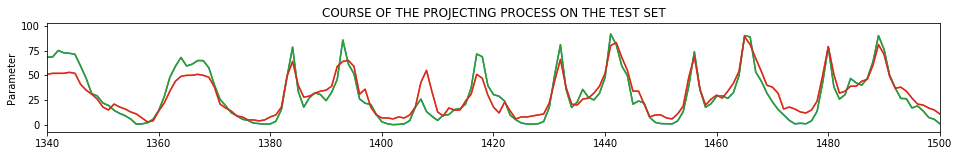

In [47]:
fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y', 'y_pred']:
    ax.plot(NOWA, label=ewa)
    
ax.set_xlim(1340, 1500)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

<span style="font-size: 180%;color:#1155cc"> Podstawienie do modelu rekordu, który chcieliśmy sprawdzić

In [28]:
def predict(self):
    print ("Predicted data based on trained weights: ")
    print ("Input (scaled): \n" + str(xPredicted))
    print ("Output: \n" + str(self.forward(xPredicted)))      

In [29]:
predict(NN)

Predicted data based on trained weights: 
Input (scaled): 
tensor([0.2539, 0.8952, 1.0000], device='cuda:0')
Output: 
tensor([3.7080e-14], device='cuda:0')


<span style="font-size: 180%;color:red">Sprawdźmy czy dobrze policzy Afganistan 2017

In [30]:
TEST = df[(df['Country']=='Afghanistan')&(df['Year']==2017)]
TEST[['Economy (GDP per Capita)','Freedom','Trust (Government Corruption)']]

,Economy (GDP per Capita),Freedom,Trust (Government Corruption)
330,0.401477,0.10618,0.061158


In [31]:
TEST['Economy (GDP per Capita)']

330    0.401477
Name: Economy (GDP per Capita), dtype: float64

In [32]:
TEST['Freedom']

330    0.10618
Name: Freedom, dtype: float64

In [33]:
TEST['Trust (Government Corruption)']

330    0.061158
Name: Trust (Government Corruption), dtype: float64

In [34]:
x_Test = torch.tensor(([0.0972, 0.2341, 0.3198]), dtype=torch.float,device=device)
print('Tensor zmiennych do prognozy: ',x_Test.size())

Tensor zmiennych do prognozy:  torch.Size([3])


TRansponuje wektor zmiennych niezależnych aby stał się kolumną

In [35]:
def predict(self,f):
    print ("Predicted data based on trained weights: ")
    print ("Input (scaled): \n" + str(f))
    print ("Output: \n" + str(self.forward(f)))  

In [36]:
predict(NN,x_Test)

Predicted data based on trained weights: 
Input (scaled): 
tensor([0.0972, 0.2341, 0.3198], device='cuda:0')
Output: 
tensor([3.9715e-14], device='cuda:0')


Odpowiedź prawidłowa brzmi: 

In [37]:
df[(df['Country']=='Afghanistan')&(df['Year']==2017)]['Happiness Score']

330    3.794
Name: Happiness Score, dtype: float64